In [464]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [465]:
import warnings
warnings.filterwarnings('ignore')

In [466]:
data=pd.read_csv('Database.csv',index_col=None)

In [467]:
Label=data.iloc[:,-22:-3]
for i in range(Label.shape[0]):
    for j in range(Label.shape[1]):
        if Label.iloc[i,j]!=0:
            Label.iloc[i,j]=1

In [468]:
x=data.iloc[:,3:13]
x_encode=pd.get_dummies(x,columns=x.columns)


In [469]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.3)
x_feature=pca.fit_transform(x_encode.values)

In [470]:
X_train,X_test,Y_train,Y_test=train_test_split(x_feature,Label,test_size=0.25,shuffle=True)

In [471]:
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
Multi_Classifier=MultiOutputClassifier(XGBClassifier())
clf_classification=Pipeline([('Classifier',Multi_Classifier)])
clf_classification.fit(X_train,Y_train)
print(clf_classification.score(X_train,Y_train))
y_pred=pd.DataFrame(Multi_Classifier.predict(X_test))
y_pred.columns=pd.DataFrame(Label).columns
y_pred.to_csv('D:/OneDrive/SRTP/output_pred.csv',encoding='utf-8_sig')
Y_test.to_csv('D:/OneDrive/SRTP/output_test.csv',encoding='utf-8_sig')

0.5540540540540541


In [472]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.43      0.55      0.48        11
           2       0.56      0.50      0.53        10
           3       0.50      0.71      0.59         7
           4       0.20      0.50      0.29         2
           5       1.00      0.25      0.40         4
           6       0.79      1.00      0.88        19
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         2
           9       0.50      0.33      0.40        12
          10       0.62      0.73      0.67        11
          11       0.00      0.00      0.00         2
          12       0.80      0.89      0.84        18
          13       0.00      0.00      0.00         1
          14       0.43      0.38      0.40         8
          15       1.00      0.91      0.95        22
          16       0.00      0.00      0.00         2
          17       0.00    

[0.80986718 0.88233747 0.90487288 0.87980288 0.86516775]
[0.5650224  0.59464285 0.63257337 0.62768328 0.62562799]


<function matplotlib.pyplot.show(close=None, block=None)>

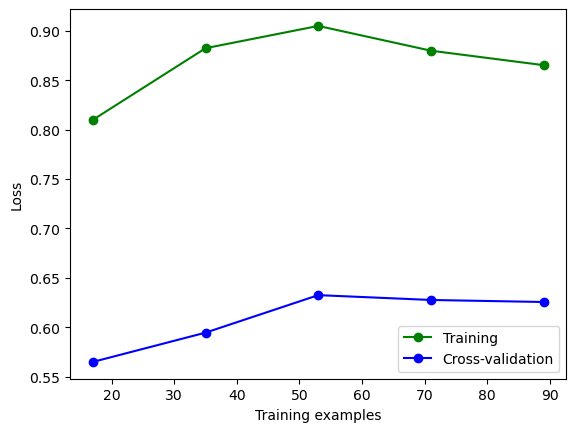

In [473]:
from sklearn.model_selection import learning_curve
train_size,train_score,valid_score=learning_curve(XGBClassifier(),x,Label,cv=10,scoring='f1_weighted',train_sizes=[0.2,0.4,0.6,0.8,1])
train_score_mean=np.mean(train_score,axis=1)
val_score_mean=np.mean(valid_score,axis=1)
print(train_score_mean)
print(val_score_mean)
plt.plot(train_size,train_score_mean,'o-',color='g',label='Training')
plt.plot(train_size,val_score_mean,'o-',color='b',label='Cross-validation')
plt.xlabel('Training examples')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show